In [1]:
%conda install matplotlib -y

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 23.3.1
  latest version: 23.10.0

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.10.0



# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


## Simple Linear Regression

### LSM(Least Square Method)
Calculate a model that minimizes the sum of squares of the error

,area,price
0,4,1000
1,12,1100
2,24,5000
3,40,20000
4,75,35000


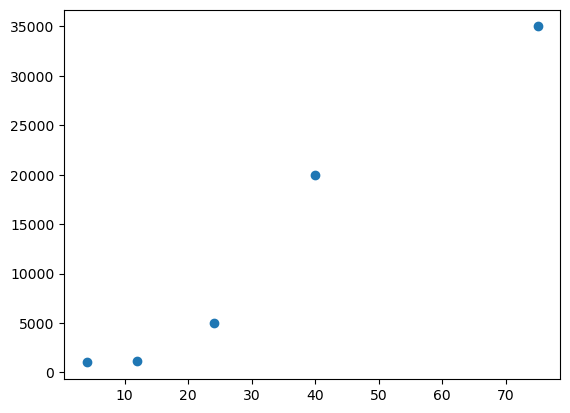

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

example = pd.DataFrame({'area': [4, 12, 24, 40, 75], 'price': [1000, 1100, 5000, 20000, 35000]})
display(example)

plt.scatter(example['area'], example['price'])
plt.show()

In [3]:
import numpy as np
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(example['area'].to_numpy().reshape(-1, 1), example['price'].to_numpy().reshape(-1, 1))

LinearRegression()

In [9]:
print(f"calculated regression formula: y = {lr.intercept_} + {lr.coef_[0]}X + e")

for i in example.index:
    print(f"{i+1}th error: {example.loc[i]['price'].reshape(-1, 1) - lr.predict(example.loc[i]['area'].reshape(-1, 1))}")

calculated regression formula: y = [152.13348416] + [714.7382595]X + e
1th error: [[-2011.08652215]]
2th error: [[-7628.99259812]]
3th error: [[-12305.85171207]]
4th error: [[-8741.663864]]
5th error: [[-18757.50294637]]


### R^2 and T-test

Null Hypothesis: There is no linear relationship between independent and dependent variables.  
Alternative Hypothesis: There is a linear relationship between independent and dependent variables.

In [5]:
import statsmodels.api as sm

results = sm.OLS(example['price'], sm.add_constant(example['area'])).fit()
results.summary()

/Users/choijennifer/anaconda3/lib/python3.10/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                     80.31
Date:                Sat, 18 Nov 2023   Prob (F-statistic):            0.00293
Time:                        18:28:09   Log-Likelihood:                -46.252
No. Observations:                   5   AIC:                             96.50
Df Residuals:                       3   BIC:                             95.72
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3660.5133   2309.644     -1.585      0.211    -1.1e+04    3689.805
area         518.7262     57.882      8.962      0.003     334.519     702.934
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.417
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.425
Skew:                          -0.195   Prob(JB):                        0.809
Kurtosis:                       1.626   Cond. No.                         63.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Interpretation  
First, the coefficient of determination is 0.964, so our model describes most of the data.  
In addition, since the p-value for an area is 0.003, there is sufficient evidence to reject the null hypothesis at the 99.6% confidence level.  
=> There is a linear relationship between the two variables!

## Practice

### Simple Linear Regression practice
The following are some of the data regarding diabetic patients. Propose a model to describe diabetes levels using blood pressure (bp).

In [6]:
from sklearn import datasets
dia = datasets.load_diabetes()

dia = pd.DataFrame(dia['data'], index=dia['target'], columns=dia['feature_names'])
display(dia)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
151.0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
75.0,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
141.0,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
206.0,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
135.0,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
178.0,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
104.0,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
132.0,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
220.0,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


First, only BMI and diabetes levels are extracted.

In [7]:
dia = dia['bp']
display(dia)

151.0    0.021872
75.0    -0.026328
141.0   -0.005670
206.0   -0.036656
135.0    0.021872
           ...   
178.0    0.059744
104.0   -0.067642
132.0    0.017293
220.0    0.001215
57.0    -0.081413
Name: bp, Length: 442, dtype: float64

The model describing these two is now calculated using the least squares method.

In [10]:
import numpy as np
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(dia.values.reshape(-1, 1), dia.index.to_numpy().reshape(-1, 1))

print(f"Model: y = {lr.intercept_} + {lr.coef_[0]}X + e")

Model: y = [152.13348416] + [714.7382595]X + e
